<a href="https://colab.research.google.com/github/angel870326/NTU_ManufacturingDataScience/blob/main/MDS_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.10.04 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Manufacturing Data Science Assignment 1**

1.   (35%) Linear Regression Analysis for Wine Quality
2.   (35%) Association Rule - Market Basket Analysis
3.   (30%) Manufacturing System Analysis




In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##**1. (35%) Linear Regression Analysis for Wine Quality**

For the attached metal furnace dataset ([MDS_Assignment1_furnace.csv](https://www.kaggle.com/esotericazzo/metal-furnace-dataset)), please use “**multiple regression**” to find the potential linear pattern (i.e., linear regression equation) for 621 observations with 28 input variables (f0-f27) and 1 output variable (grade) (label variable is regarded as continuous variable 反應變數請視為連續變數). Please answer the following questions by using Python software and package:

In [3]:
data_furnace = pd.read_csv('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 1/Assignment1_Data/MDS_Assignment1_furnace.csv')
print(data_furnace.shape)
data_furnace.head()

(620, 29)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [4]:
furnace_x = data_furnace.drop('grade', axis= 1)
furnace_y = data_furnace['grade']
print(furnace_x)
print(furnace_y)

           f0        f1        f2        f3        f4        f5        f6  \
0    1.848564 -0.264250 -0.461423  0.409400  1.305455  2.329398  0.370965   
1   -0.825098 -0.264250  3.032397 -2.442599  1.305455 -0.276144  0.370965   
2    1.848564 -0.264250 -0.461423  0.409400  1.305455  2.329398  0.370965   
3    0.511733 -0.264250 -0.461423  0.409400 -0.525726 -0.276144  0.370965   
4   -0.825098 -0.264250 -0.461423  0.409400 -0.525726 -0.276144  0.370965   
..        ...       ...       ...       ...       ...       ...       ...   
615 -0.825098 -0.264250  2.004803 -2.442599  1.305455 -0.276144  0.370965   
616 -0.379487  3.809407 -0.461423  0.409400  1.305455 -0.276144  0.370965   
617 -0.825098 -0.264250 -0.461423  0.409400 -0.525726 -0.276144  0.370965   
618 -0.825098 -0.264250  2.004803 -2.442599  1.305455 -0.276144  0.370965   
619 -0.379487  3.068742 -0.461423  0.409400  1.305455 -0.276144  0.370965   

           f7        f8   f9  ...       f18       f19       f20       f21  

###**(a) (10%) Show the results of regression analysis as follows.**


In [5]:
# ols
import statsmodels.api as sm
furnace_x = sm.add_constant(furnace_x) # add intercept
ols = sm.OLS(furnace_y, furnace_x)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     21.52
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           1.16e-70
Time:                        10:20:43   Log-Likelihood:                -381.52
No. Observations:                 620   AIC:                             819.0
Df Residuals:                     592   BIC:                             943.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0339      0.018    110.528      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [6]:
# Check by sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(furnace_x, furnace_y)
print(model.coef_)

[-2.88392244e-18 -5.54643537e-03  4.39757930e-02  3.13959158e-01
  1.85854695e-02 -3.47612081e-03 -7.39929207e-02 -7.10496406e-02
  2.35193314e-02  4.10135299e-02 -2.22044605e-16 -4.45947265e-02
 -2.91534644e-02 -5.92633441e-04  3.36314071e-02 -1.83217548e-01
 -1.06087477e-01 -3.57714163e-02  6.33103768e-02 -1.90384828e-01
  2.77546560e-02  1.25629063e-02 -3.56736859e-02  7.46800928e-02
 -8.76886967e-03  1.93027419e-02 -6.79217117e-02 -3.60055794e-02
 -6.20144026e-03]


In [7]:
# Results
from IPython.display import display
pd.set_option('display.float_format', lambda x: '%.6f' % x) # 消除科學記號

ols_analysis = pd.concat([ols_result.params, ols_result.bse, ols_result.tvalues, ols_result.pvalues], axis=1).iloc[1: , :]
ols_analysis.columns = ["estimate", "std. error", "t-value", "p-value"]
ols_analysis.index.name = 'variable'

display(ols_analysis)
print("R-squared: ", round(ols_result.rsquared,4), ", Adjusted R-squared: ", round(ols_result.rsquared_adj,4))

,estimate,std. error,t-value,p-value
variable,,,,
f0,-0.005546,0.024810,-0.223556,0.823180
f1,0.043976,0.027994,1.570899,0.116740
f2,0.313959,0.034774,9.028495,0.000000
f3,0.018585,0.041537,0.447439,0.654722
f4,-0.003476,0.038199,-0.091000,0.927523
f5,-0.073993,0.029802,-2.482781,0.013312
f6,-0.071050,0.025914,-2.741766,0.006296
f7,0.023519,0.027563,0.853298,0.393839
f8,0.041014,0.018896,2.170495,0.030366


R-squared:  0.4954 , Adjusted R-squared:  0.4724


###**(b) (5%) The fitting of the linear regression is a good idea? If yes, why? If no, why? What’s the possible reason of poor fitting?**

The above linear regression model is not a good fit. Only 47% of the variability observed in the variables can be explained by the model.

Variable f9 has a much smaller coefficient and standard error than other variables. It might indicate that there is a strong multicollinearity problem or that the design matrix is constant. If we count the frequency each value occurs in variable f9 as below, we can see that it has a constant value 0 for all the observations.

In [8]:
# Check if f9 is constant
data_furnace['f9'].value_counts()

0.000000    620
Name: f9, dtype: int64

###**(c) (5%) Based on the results, rank the independent variables by p-values and which one are statistically significant variables with p-values<0.01? (i.e. 重要變數挑選)**

In [9]:
# Sort variables by their p-values
ols_analysis_sorted = ols_analysis.drop(index=('f9')).sort_values(by=['p-value'])
ols_analysis_sorted

,estimate,std. error,t-value,p-value
variable,,,,
f18,-0.190385,0.020707,-9.194397,0.000000
f2,0.313959,0.034774,9.028495,0.000000
f14,-0.183218,0.020591,-8.897917,0.000000
f15,-0.106087,0.019063,-5.565229,0.000000
f22,0.074680,0.021138,3.532993,0.000443
f17,0.063310,0.018572,3.408826,0.000697
f25,-0.067922,0.019942,-3.405891,0.000704
f6,-0.071050,0.025914,-2.741766,0.006296
f5,-0.073993,0.029802,-2.482781,0.013312


In [10]:
# Variables with p-value < 0.01
print("Statistically significant variables with p-values < 0.01: ")
ols_analysis_sorted.index[ols_analysis_sorted['p-value'] < 0.01].tolist()

Statistically significant variables with p-values < 0.01: 


['f18', 'f2', 'f14', 'f15', 'f22', 'f17', 'f25', 'f6']

*Note: Variable f9 is dropped since it has a constant value for all the observations.

###**(d) (15%) Testify the underlying assumptions of regression (1) Normality, (2) Independence, and (3) Homogeneity of Variance with respect to residual.**

####**(1) Normality**

Method 1: Histogram

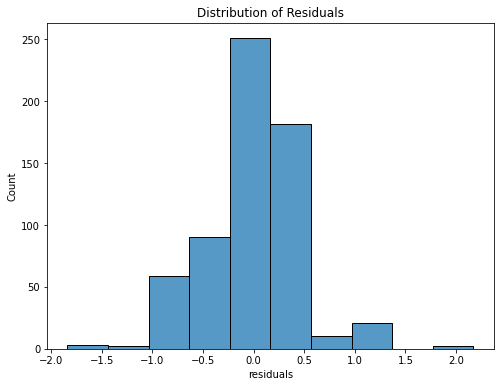

In [11]:
# Plot the residuals distribution (histogram)
plt.subplots(figsize=(8, 6))
plt.title('Distribution of Residuals')
plt.xlabel('residuals')
sns.histplot(ols_result.resid, bins=10)
plt.show()

The distribution of residuals is not bell-shaped. Residuals are not normally distributed.

Method 2: Anderson-Darling test

In [12]:
from scipy import stats
mu, std = stats.norm.fit(ols_result.resid)
mu, std

(-1.899555781487687e-15, 0.4477239873915288)

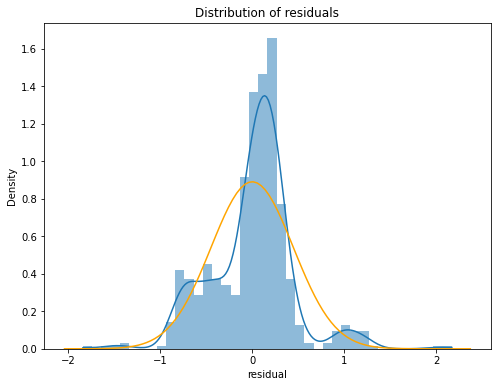

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the residuals distribution
sns.histplot(x=ols_result.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# Plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

In [14]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(ols_result.resid)[1]
print('p-value from Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed.')
else:
    print('Residuals are normally distributed.')

p-value from Anderson-Darling test below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed.


Method 3: QQ-plot

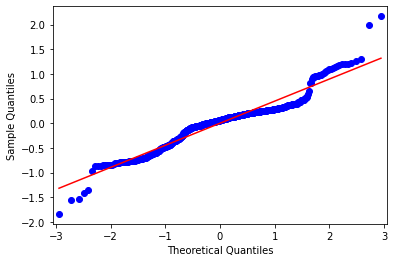

In [15]:
sm.qqplot(ols_result.resid, line='s')
plt.show()

The Q-Q plot deviates from the straight line. Residuals are not normally distributed.

#### **(2) Independence**

In [16]:
# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
durbin_watson(ols_result.resid)

2.004053480472211

As the Durbin-Watson statistic is close to 2, we fail to reject the null hypothesis. Hence, we conclude that the residuals are not autocorrelated, which means they are independent.



#### **(3) Homogeneity**

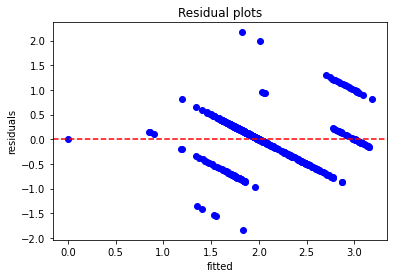

In [17]:
# Residual plots
plt.title('Residual plots')
plt.xlabel('fitted')
plt.ylabel('residuals')
plt.scatter(ols_result.predict(furnace_x), ols_result.resid, c ="blue")
plt.axhline(y = 0, color = 'r', linestyle = 'dashed')   
plt.show()

The spread of the residual points across predicted values are not the same. Homoscedasticity assumption is violated.


##**2. (35%) Association Rule - Market Basket Analysis**
Imagine 10000 receipts sitting on your table. Each receipt represents a transaction with items that were purchased. The receipt is a representation of stuff that went into a customer’s basket – and therefore ‘Market Basket Analysis’.

That is exactly what the Groceries Data Set contains: a collection of receipts with each line representing 1 receipt and the items purchased. Each line is called a transaction and each column in a row represents an item. You can see the Groceries data set ([groceries.csv](http://www.salemmarafi.com/wp-content/uploads/2014/03/groceries.csv)). Use **“association rule ([guideline](https://pbpython.com/market-basket-analysis.html))”** to find the potential patterns which satisfy the following criterion:
* Set the minimum support to 0.001
* Set the minimum confidence of 0.15

Please answer the following questions:

###**(1) (10%) How to handle the raw dataset via data preprocessing?**

In [18]:
# Load a csv file with different row lengths as a list
import csv
with open('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 1/Assignment1_Data/MDS_Assignment1_groceries.csv', newline='') as csvfile:
    data_groceries_raw = list(csv.reader(csvfile))
print(data_groceries_raw)

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['pot plants'], ['whole milk', 'cereals'], ['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate'], ['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes'], ['beef'], ['frankfurter', 'rolls/buns', 'soda'], ['chicken', 'tropical fruit'], ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'], ['fruit/vegetable juice'], ['packaged fruit/vegetables'], ['chocolate'], ['specialty bar'], ['other vegetables'], ['butter milk', 'pastry'], ['whole milk'], ['tropical fruit', 'cream che

Since the `apriori` function expects data in a one-hot encoded pandas DataFrame, we can use `TransactionEncoder` object to transform the dataset into a suitable format. The `fit` method can learn the unique labels in the dataset. The `transform` method can transform the input list into a one-hot encoded boolean array. Then we can convert the array to a dataframe.

In [19]:
# Transform the data into one-hot encoded boolean dataframe
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(data_groceries_raw).transform(data_groceries_raw)
data_groceries = pd.DataFrame(te_ary, columns=te.columns_)
data_groceries

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###**(2) (10%) What’s the top 5 association rules? Show the support, confidence, and lift to each specific rule, respectively?**

In [20]:
# Find frequent itemsets (minimum support = 0.001)
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(data_groceries, min_support=0.001, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.003559,(abrasive cleaner)
3,0.003254,(artif. sweetener)
4,0.017692,(baking powder)
...,...,...
13487,0.001017,"(root vegetables, whole milk, yogurt, other ve..."
13488,0.001017,"(root vegetables, whole milk, oil, tropical fr..."
13489,0.001322,"(root vegetables, whole milk, pip fruit, tropi..."
13490,0.001322,"(root vegetables, whole milk, rolls/buns, trop..."


In [21]:
# Generate the rules with their corresponding support, confidence and lift
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.15) #  minimum confidence = 0.15
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(butter),0.008033,0.055414,0.001220,0.151899,2.741145,0.000775,1.113765
1,(Instant food products),(curd),0.008033,0.053279,0.001322,0.164557,3.088583,0.000894,1.133196
2,(Instant food products),(hamburger meat),0.008033,0.033249,0.003050,0.379747,11.421438,0.002783,1.558640
3,(Instant food products),(other vegetables),0.008033,0.193493,0.002745,0.341772,1.766332,0.001191,1.225271
4,(Instant food products),(pastry),0.008033,0.088968,0.001423,0.177215,1.991899,0.000709,1.107254
...,...,...,...,...,...,...,...,...,...
32738,"(yogurt, whole milk, other vegetables, whipped...","(root vegetables, tropical fruit)",0.005592,0.021047,0.001118,0.200000,9.502415,0.001001,1.223691
32739,"(whipped/sour cream, yogurt, other vegetables,...","(root vegetables, whole milk)",0.003559,0.048907,0.001118,0.314286,6.426195,0.000944,1.387011
32740,"(root vegetables, whipped/sour cream, tropical...","(yogurt, whole milk, other vegetables)",0.004575,0.022267,0.001118,0.244444,10.977676,0.001017,1.294058
32741,"(root vegetables, yogurt, whipped/sour cream)","(whole milk, other vegetables, tropical fruit)",0.006406,0.017082,0.001118,0.174603,10.221561,0.001009,1.190843


In [22]:
# Find top 5 by lift
top5_rules = rules.nlargest(5, ['lift'])
top5_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
2430,(liquor),"(bottled beer, red/blush wine)",0.001932,0.174312,35.715787
2429,"(bottled beer, red/blush wine)",(liquor),0.001932,0.395833,35.715787
32659,"(whole milk, oil, tropical fruit)","(root vegetables, yogurt, other vegetables)",0.001017,0.400000,30.976378
32657,"(root vegetables, yogurt, oil)","(whole milk, other vegetables, tropical fruit)",0.001017,0.526316,30.811404
32539,"(domestic eggs, yogurt, whole milk, other vege...","(butter, tropical fruit)",0.001017,0.303030,30.411255


###**(3) (5%) Please provide/guess the “story” to interpret one of top-5 rules you are interested in.**

Antecedents: (oil, whole milk, tropical fruit) <br/>
Consequents: (root vegetables, yogurt, other vegetables)

For customers who buy oil, whole milk and tropical fruit, it is obvious that they often cook at home. Whole milk is just like water for Americans. And many people have milk for breakfast. If they buy tropical fruits, they can have fruit yogert as breakfast or dessert. As for oil, customers can use it to cook vegetables. Stir-fry the root vegetables like garlic and other ingredients in oil might be a good choice as well.

###**(4) (10%) Give a visualization graph of your association rules.**

In [23]:
# Generate scatterplots
def plotAssociationRules(axis_x, axis_y, axis_z, i):
  sns.set(font_scale=1.2) # increase font size
  sns.scatterplot(x=axis_x, y=axis_y, hue=axis_z, size=axis_z, data=rules, ax=axs[i]).set(title='Association Rules')

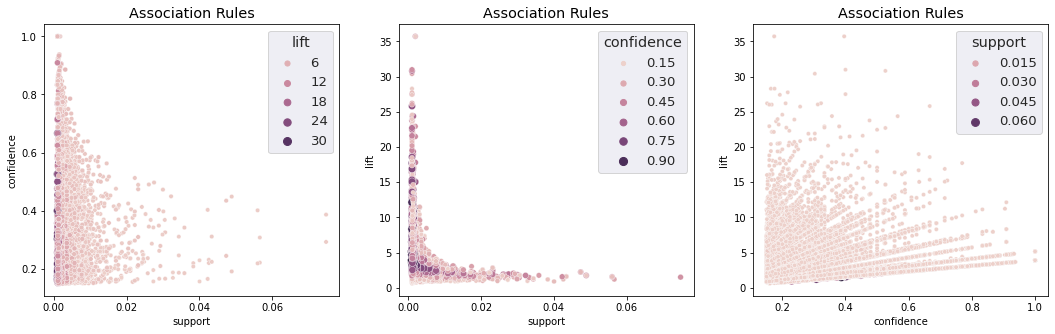

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(18,5))
plotAssociationRules("support", "confidence", "lift", 0)
plotAssociationRules("support", "lift", "confidence", 1)
plotAssociationRules("confidence", "lift", "support", 2)

##**3. (30%) Manufacturing System Analysis**

針對一流水線產線，有五個工作站，每個工作站的機台數與其每機台的加工時間如下表。

<img src="https://drive.google.com/uc?export=view&id=12eXW5BkcKl-RtTrWxjN6JUsjo9Zo-bZI" width="500"/>


In [25]:
data_ms = [[1,3,5],[2,3,8],[3,6,12],[4,2,4],[5,5,12]]
df_ms = pd.DataFrame(data_ms, columns = ['工作站編號','機台數','加工時間'])
df_ms

,工作站編號,機台數,加工時間
0,1,3,5
1,2,3,8
2,3,6,12
3,4,2,4
4,5,5,12


###**(a) (10%) 根據 Little’s Law，試計算各工作站的產出率 TH 於下表；試問瓶頸站的產出率rb、最小生產週期時間(總加工時間，T0)、關鍵在製品水準(W0)各為多少?**

In [26]:
# 計算各工作站的產出率
def calculate_th(row):
    return row['機台數'] / row['加工時間']

df_ms['TH'] = df_ms.apply(calculate_th, axis=1)
df_ms

,工作站編號,機台數,加工時間,TH
0,1,3,5,0.600000
1,2,3,8,0.375000
2,3,6,12,0.500000
3,4,2,4,0.500000
4,5,5,12,0.416667


In [27]:
# 瓶頸站
bottleneck = df_ms.loc[df_ms['TH'].idxmin()]
bottleneck

工作站編號   2.000000
機台數     3.000000
加工時間    8.000000
TH      0.375000
Name: 1, dtype: float64

In [28]:
rb = bottleneck['TH']
t0 = df_ms['加工時間'].sum()
w0 = round(rb*t0)
print("瓶頸站產出率(rb)：", rb)
print("最小生產週期時間(T0)：", t0)
print("關鍵在製品水準(W0)：", w0)

瓶頸站產出率(rb)： 0.375
最小生產週期時間(T0)： 41
關鍵在製品水準(W0)： 15


###**(b) (10%) 試給出最佳績效(best case)下，最大的產出率(THbest)與最小生產週期時間 (CTbest)的計算公式（提示：講義 22-29 頁）**

當在製品數(WIP) <= 關鍵在製品水準(W0)：<br/>
產線的最大產出率(THbest)為 (在製品數(WIP) / T0)，而最小生產週期時間(CTbest)為T0

當在製品數(WIP) > 關鍵在製品水準(W0)：<br/>
產線的最大產出率(THbest)為瓶頸站產出率rb，而最小生產週期時間(CTbest)為 (在製品數(WIP) / rb)


In [29]:
def bestCase(wip):
  if wip <= w0:
    THbest = wip / t0
    CTbest = t0
  else:
    THbest = rb
    CTbest = wip / rb
  return pd.DataFrame({'WIP':[wip],
                       'TH': [THbest], 
                       'CT': [CTbest]})

###**(c) (10%) 根據該問題的產線，試程式撰寫建立一模擬模型(或用套裝軟體、數值分析)來驗證，當在製品 WIP 數量超過工廠產能時，其生產週期將嚴重惡化。也就是當產線的投料速度(投產量)大於產線的產出率，此時生產系統將處於非穩態的狀態(non-steady state)。 試用圖表呈現 WIP、CT 與 TH 之間惡化的關係。（提示：講義 22-29 頁）**

In [30]:
# 計算最佳績效(best case)下，WIP為1到30的最大產出率(THbest)及最小生產週期時間 (CTbest)
bestCase_df = bestCase(1)
for wip in range(2,31):
  bestCase_df = pd.concat([bestCase_df, bestCase(wip)], ignore_index = True)
bestCase_df

,WIP,TH,CT
0,1,0.024390,41.000000
1,2,0.048780,41.000000
2,3,0.073171,41.000000
3,4,0.097561,41.000000
4,5,0.121951,41.000000
5,6,0.146341,41.000000
6,7,0.170732,41.000000
7,8,0.195122,41.000000
8,9,0.219512,41.000000
9,10,0.243902,41.000000


由上表可以看到當WIP大於W0=15，生產週期逐漸增加

In [31]:
# Mandarin
from matplotlib.font_manager import FontProperties
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
font = 'TaipeiSansTCBeta-Regular.ttf'
fontP = FontProperties(fname='TaipeiSansTCBeta-Regular.ttf')

--2022-10-04 10:21:36--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.31.139, 74.125.31.113, 74.125.31.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oce3oqigjh6t88c111b138slpfun8omv/1664878875000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b58fe709-953b-4dd8-b703-4c2969ffe2f2 [following]
--2022-10-04 10:21:36--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oce3oqigjh6t88c111b138slpfun8omv/1664878875000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b58fe709-953b-4dd8-b703-4c2969ffe2f2
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0k-9o

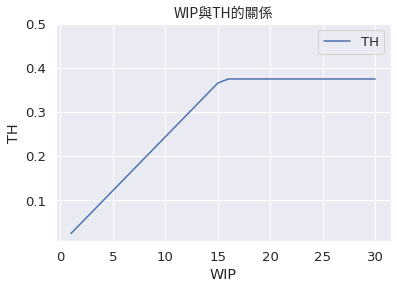

In [32]:
# WIP與TH的關係
th_plot = bestCase_df.plot(x='WIP', y='TH')
th_plot.set_ylim(top=0.5)
th_plot.set_ylabel('TH')
plt.title("WIP與TH的關係", fontproperties=fontP, fontsize=14)
plt.show()

由WIP與TH的關係圖可以看出：
* 當在製品數量(WIP)低於W0=15時，TH隨著WIP的增加等比例上升
* 當在製品數量(WIP)高於W0=15時，TH則維持在瓶頸站產出率(rb)

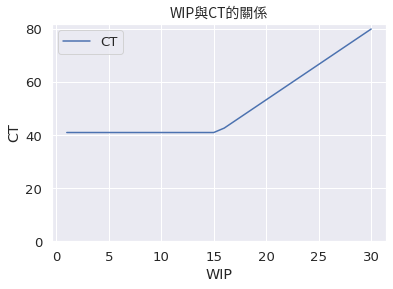

In [33]:
# WIP與CT的關係
ct_plot = bestCase_df.plot(x='WIP', y='CT', ylim=0)
ct_plot.set_ylabel('CT')
plt.title("WIP與CT的關係", fontproperties=fontP, fontsize=14)
plt.show()

由WIP與CT的關係圖可以看出：
* 當在製品數量(WIP)低於W0=15時，CT維持在t0=41
* 當在製品數量(WIP)高於W0=15時，CT隨著WIP的增加等比例上升，生產週期因為投產量高於產出率而開始惡化